-0.6660587453562982

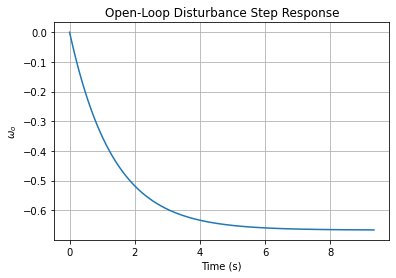

In [1]:
# Author: ChangYuan Liu (changyuan.liu@gmail.com)
# Date: 2019-12-16
# Page 269
# Speed Tachometer Example
import numpy as np
import control.matlab as cm
import matplotlib.pyplot as plt
import scipy.linalg as splg
%matplotlib inline
Ra = 1.0
Km = 10.0
J = 2.0
b = 0.5
Kb= 0.1
num1 = np.array([1])
den1 = np.array([J,b])
sys1 = cm.tf(num1, den1)
num2 = np.array([Km*Kb/Ra])
den2 = np.array([1])
sys2 = cm.tf(num2, den2)
sys_o = cm.feedback(sys1, sys2)
sys_o = -sys_o
yo, T = cm.step(sys_o)

plt.figure(1)
plt.plot(T, yo)
plt.title('Open-Loop Disturbance Step Response')
plt.xlabel('Time (s)')
plt.ylabel(r'$\omega_o$')
plt.grid()
yo[T.size-1]



-0.0018450380757792154

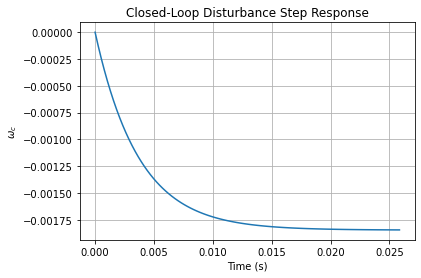

In [2]:
# Author: ChangYuan Liu (changyuan.liu@gmail.com)
# Date: 2019-12-16
# Page 270
# Speed Tachometer Example
import numpy as np
import control.matlab as cm
import matplotlib.pyplot as plt
import scipy.linalg as splg
%matplotlib inline
Ra = 1.0
Km = 10.0
J = 2.0
b = 0.5
Kb= 0.1
Ka = 54.0
Kt = 1.0
num1 = np.array([1])
den1 = np.array([J,b])
sys1 = cm.tf(num1, den1)
num2 = np.array([Ka*Kt])
den2 = np.array([1])
sys2 = cm.tf(num2, den2)
num3 = np.array([Kb])
den3 = np.array([1])
sys3 = cm.tf(num3, den3)
num4 = np.array([Km/Ra])
den4 = np.array([1])
sys4 = cm.tf(num4, den4)

sysa = cm.parallel(sys2, sys3)
sysb = cm.series(sysa, sys4)
sys_c = cm.feedback(sys1, sysb)
sys_c = -sys_c

yc, T = cm.step(sys_c)

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(T, yc)
ax1.set_title('Closed-Loop Disturbance Step Response')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel(r'$\omega_c$')
ax1.grid()
yc[T.size-1]

0 states have been removed from the model
0 states have been removed from the model


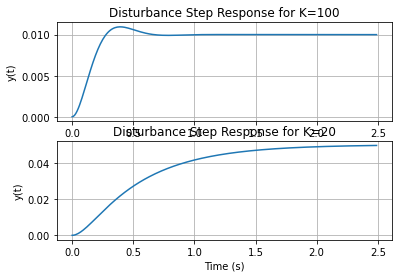

In [3]:
# Author: ChangYuan Liu (changyuan.liu@gmail.com)
# Date: 2019-12-16
# Page 272
# Response to a Disturbance
import numpy as np
import control.matlab as cm
import matplotlib.pyplot as plt
import scipy.linalg as splg
%matplotlib inline

numg = np.array([1])
deng = np.array([1,1,0])
sysg = cm.tf(numg, deng)
K1 = 100
K2 = 20
num1 = np.array([11,K1])
num2 = np.array([11,K2])
den = np.array([0,1])
sys1 = cm.tf(num1, den)
sys2 = cm.tf(num2, den)
sysa = cm.feedback(sysg, sys1)
sysa = cm.minreal(sysa)
sysb = cm.feedback(sysg, sys2)
sysb = cm.minreal(sysb)

t = np.arange(0,2.5,0.01)
y1, t = cm.step(sysa, t)
y2, t = cm.step(sysb, t)

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(t, y1)
ax1.set_title('Disturbance Step Response for K=100')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('y(t)')
ax1.grid()
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(t, y2)
ax2.set_title('Disturbance Step Response for K=20')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('y(t)')
ax2.grid()

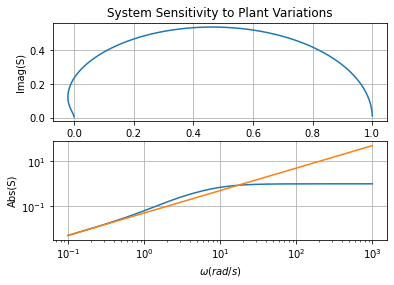

In [4]:
# Author: ChangYuan Liu (changyuan.liu@gmail.com)
# Date: 2019-12-16
# Page 274
# System Sensitivity Plot
import numpy as np
import control.matlab as cm
import matplotlib.pyplot as plt
import scipy.linalg as splg
%matplotlib inline
K = 20.0
num = np.array([1,1,0])
den = np.array([1,12,K])
w = np.logspace(-1,3,200)
s = w*1j
n = np.power(s,2) + s
d = np.power(s,2) + 12*s + K
S = n/d
n2 = s
d2 = K
S2 = n2/d2
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(np.real(S), np.imag(S))
ax1.set_title('System Sensitivity to Plant Variations')
ax1.set_xlabel('Real(S)')
ax1.set_ylabel('Imag(S)')
ax1.grid()
ax2 = fig.add_subplot(2, 1, 2)
ax2.loglog(w,np.abs(S),w,abs(S2))
ax2.set_xlabel(r'$\omega(rad/s)$')
ax2.set_ylabel('Abs(S)')
ax2.grid()

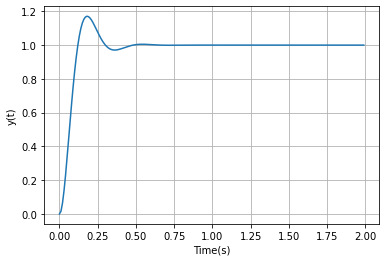

In [5]:
# Author: ChangYuan Liu (changyuan.liu@gmail.com)
# Date: 2019-12-16
# Page 276 & 277
# System Sensitivity Plot
import numpy as np
import control.matlab as cm
import matplotlib.pyplot as plt
import scipy.linalg as splg
%matplotlib inline
#Ka = 10.0
Ka = 80.0
nf = np.array([5000])
df = np.array([1,1000])
sysf = cm.tf(nf,df)
ng = np.array([1])
dg = np.array([1,20,0])
sysg = cm.tf(ng,dg)
sysa = cm.series(Ka*sysf, sysg)
sys = cm.feedback(sysa,1)
t = np.arange(0,2,0.01)
y,t = cm.step(sys,t)

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(t,y)
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('y(t)')
ax1.grid()
